# Newton-Fraktal I

Sie kennen vielleicht das [Newtonverfahren](https://de.wikipedia.org/wiki/Newtonverfahren): Eine numerische Methode, um Nullstellen einer differenzierbaren Funktion zu finden. Gegeben eine differenzierbare Funktion $f:\mathbb R\to\mathbb R$ wählen wir einen Startwert $x_0$ und iterieren dann
$$
x_{n}=x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}
$$
Wenn $f$ mehrere Nullstellen hat, so hängt es vom Startwert $x_0$ ab, gegen welche Nullstelle das Verfahren konvergiert. 

Das Newtonverfahren kann man auch einfach mit komplexen Zahlen anwenden. Als Funktion nehmen wir z.B. 
$$f:\mathbb C\to\mathbb C,\quad f(z)=z^3-1
$$
Für $f'$ nehmen wir die gewöhnliche (reelle) Ableitung: $f'(z)=3z^2$. Im Komplexen hat $f$ drei Nullstelle, nämlich $1,\frac{-1+\sqrt{3}i}{2},\frac{-1-\sqrt{3}i}{2}$. 
Wir wollen nun berechnen gegen welche Nullstelle das Newtonverfahren für welchen Startwert konvergiert. Für das Beispiel 
heißt das, wir berechnen eine Funktion $N$
$$
N:\mathbb C\to\mathbb C,\quad z\mapsto\begin{cases}
1 &\text{ Newton konvergiert gegen }1\\
2 &\text{ Newton konvergiert gegen }\frac{-1+\sqrt{3}i}{2}\\
3 &\text{ Newton konvergiert gegen }\frac{-1-\sqrt{3}i}{2}\\
0 &\text{ sonst }\\
\end{cases}
$$
approximativ. Dazu berechnen wir für Startwerte $z=u+vi$ mit $u,v\in [-1,1]$ vielleicht 100 Iterationen des Newtonverfahrens. Ist der Betrag der Differenz von $z$ zu $1$ dann höchstens $0.001$, so setzen wir $N(z)=1$, ist der Betrag der Differenz zur Wurzel $\frac{-1+\sqrt 3i}{2}$ höchstens $0.001$, so setzen Sie $N(z)=2$ und analog für die dritte Wurzel. Wenn wir dann die Funktionswerte $N$ mit verschiedenen Farben plotten, erhalten wir ein buntes Fraktal.

Übrigens, wenn es Sie interessiert, 3Blue1Brown hat [mehr](https://youtu.be/-RdOwhmqP5s?si=C09BchxQWRTl9hVp) über Newton-Fraktale. (Und auch über die Mandelbrot-Menge. Gucken Sie sich einfach jedes einzelne Video des Kanals an. Der ist wirklich gut.)

In [ ]:
# ein paar nützliche imports
import matplotlib.pyplot as plt
import numpy as np
import random 

## Funktionen definieren

Um Sie auf den Weg zu schicken, gibt es hier eine erste Implementation des Verfahrens und ein wenig Code zum plotten. Im Verlauf des Notebooks werden Sie diese Methoden erweitern und mit mehr Funktionalität versehen.

In [ ]:
def fun1(z):
    return z**3-1

def deriv1(z):
    return 3*z**2

def newton_fract(fun,derivative,real_lim=(-1,1),imag_lim=(-1,1),max_iter=40):
    """
    fun: die Funktion
    derivative: die Ableitung der Funktion
    real_lim,imag_lim: der Auswertungsbereich
    max_iter: Anzahl der Iterationen

    Rückgabe
    rr,ii: die Realteile und Imaginärteile des Auswertungsbereichs
    z: die Resultate der Newton-Iteration
    """
    resolution=500 # die Auflösung des Bildes
    reals=np.linspace(real_lim[0],real_lim[1],resolution)  # die Realteile nehmen wir aus [real_min,real_max]
    imags=np.linspace(imag_lim[0],imag_lim[1],resolution) # die Imaginärteile aus [imag_min,imag_max]
    rr,ii=np.meshgrid(reals,imags) 
    z=rr+ii*1j # dies sind unsere Startwerte

    # die Newton-Iteration
    for i in range(max_iter):
        z=z-fun(z)/derivative(z)
    return rr,ii,z

def show_fractal(rr,ii,z,roots,eps=0.01,cmap='rainbow'):
    values=np.zeros(shape=z.shape) # ein array mit lauter Nullen und den gleichen Dimensionen wie z
    for i,root in enumerate(roots): # enumerate geht die Elemente der Liste durch und liefert dazu den Index i der Listenposition
        values+=np.where(np.absolute(z-root)<eps,i,0) # wenn Element von z nahe Wurzel mit Index i, dann weise i als Wert zu
    fig,ax=plt.subplots(figsize=(4,4))
    # male Konturenplot mit Definitionsbereich rr,ii und Funktionswerten values
    # und Farbschema cmap
    ax.contourf(rr,ii,values,cmap=cmap) 

rr,ii,z=newton_fract(fun1,deriv1)
roots=[1,-0.5+3**0.5/2*1j,-0.5-3**0.5/2*1j]
show_fractal(rr,ii,z,roots)

### Aufgabe: Fraktal
Plotten Sie das Newton-Fraktal von $z\mapsto z^4-2z^3+3z^2-4z+5$ im Wertebereich $[-2,2]\times [-2,2]i$.

* Implementieren Sie das Polynom als Funktion <code>fun</code> und die Ableitung als Funktion <code>deriv</code>.
* Sie werden die Nullstellen benötigen -- hier ist eine Möglichkeit, die herauszufinden: Öffnen Sie [WolframAlpha](https://www.wolframalpha.com/) und geben Sie *find the roots of z^4-2z^3+3z^2-4z+5* ein.
* Um den Wertebereich zu erweitern (default ist $[-1,1]\times [-1,1]i$), rufen Sie <code>newton_fract</code> mit <code>real_lim=[-2,2]</code> und <code>imag_lim=[-2,2]</code> auf.

In [ ]:
### BEGIN SOLUTION
# Ihre Lösung hier
### END SOLUTION

## Nullstellen finden

Was wenn, wir das Newton-Fraktal der Funktion
$$
f:z\mapsto z^7+z^4-2
$$
berechnen wollen? Die Funktion ist relativ harmlos und die Ableitung lässt sich leicht ermitteln. Einziges Problem: Bisher mussten wir die Nullstellen explizit angeben und das ist hier schwieriger. Andererseits findet das Newton-Verfahren ja gerade Nullstellen, dh, wir müssen nur schauen, gegen welche Werte das Newton-Verfahren konvergiert. 

### Aufgabe: Nullstellen
Implementieren Sie die Funktion <code>find_roots(z,eps=0.01,K=1000)</code>. (Warum *root*? Weil Nullstellen im Englischen so genannt werden.) Was soll die Funktion leisten?
* Es sollen die Häufungspunkte der Menge <code>z</code> ausgegeben werden. Dh, geben Sie die Elemente $r$ aus, so dass alle anderen Elemente $p$ in <code>z</code> höchstens einen Abstand von <code>eps</code> zu einem der Häufungspunkte $r$ haben.
* Dabei sollen jedoch alle Elemente $p$ in <code>z</code> ignoriert werden, die einen Betrag von größer <code>K</code> haben. Wir nehmen hier an, dass diese Elemente nicht konvergiert sind.
* Rückgabe: Die Liste der Häufungspunkte.
  
Hinweis: Statt alle Elemente von <code>z</code> durchzugehen, können Sie sich auf eine zufällige Auswahl von zB 1000 Elementen von <code>z</code> beschränken. Mit hoher Wahrscheinlichkeit enthält die Auswahl bereits alle Häufungspunkte und die Überprüfung einer kleineren Menge beschleunigt das Verfahren. Mehr über zufällige Auswahlen finden Sie [hier.](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.choice.html) Eventuell nützlich dabei ist auch der Befehl <code>some_array.flat</code> (Doku [hier](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flat.html)): Damit lässt sich ein multidimensionaler array, zB eine Matrix wie <code>z</code>, als 1-dimensionale Liste adressieren. 

In [ ]:
def find_roots(zz,eps=0.01,K=1000):
    ### BEGIN SOLUTION
# Ihre Lösung hier
    ### END SOLUTION

rr,ii,z=newton_fract(fun1,deriv1)
find_roots(z) # hier sollten ungefähr -0.5+0.87j,-0.5+0.87j,1 herauskommen

### Aufgabe: Grad 7-Polynom
* Implementieren Sie das Polynom $z^7+z^4-2$ als Methode <code>fun2</code> und dessen Ableitung als <code>deriv2</code>.
* Nutzen Sie <code>find_roots</code> und <code>show_fractal</code>, um das Newton-Fraktal von 
$$
z^7+z^4-2
$$
zu plotten. Wählen Sie dazu einen passenden Definitionsbereich.
Achtung: 40 Iterationen werden wahrscheinlich nicht ausreichen.

In [ ]:
### BEGIN SOLUTION
# Ihre Lösung hier
### END SOLUTION

## Anzahl der Iterationen zählen

Die Bilder bisher waren vielleicht interessant, aber nicht hübsch. Das wollen wir jetzt ändern.

Wie schnell die Konvergenz zu einer Wurzel ist, hängt vom Startwert ab. Wir wollen die Anzahl der Iterationen ermitteln bis sich ein Startwert nicht mehr groß verändert. Dazu legen wir ein $\epsilon>0$ fest und bestimmen dann für jeden Startwert $z_0\in\mathbb C$ des Newtonverfahrens das kleinste $i$, so dass
$$
|z_i-z_{i+1}|<\epsilon
$$

### Aufgabe: Iterationen
Wir adaptieren die Methode <code>newton_fract</code>, so dass die Anzahl der Iterationen mit berechnet wird. Die Anzahl der Iterationen soll im *array* 
<code>iterations</code> zurückgegeben werden. Der *array* soll die gleichen Dimensionen wie <code>z</code> haben und <code>iterations[i,j]</code> soll festhalten, wie lange <code>z[i,j]</code> bis zur Konvergenz gebraucht hat.

* Erhöhen Sie in der Schleife unten <code>iterations</code> um 1 an den Stellen, an denen Konvergenz noch *nicht* erfolgt ist.
Hinweis: Mit <code>np.where</code> ([Doku](https://numpy.org/doc/stable/reference/generated/numpy.where.html)) können Sie in jedem Schleifendurchgang die Anzahl der Iterationen dort um eins erhöhen, wo noch keine Konvergenz eingetreten ist. 

In [ ]:
def newton_fract(fun,derivative,real_lim=(-1,1),imag_lim=(-1,1),max_iter=40,eps=0.001):
    """
    fun: die Funktion
    derivative: die Ableitung der Funktion
    real_lim,imag_lim: der Auswertungsbereich
    max_iter: Anzahl der Iterationen
    eps: ist |z_i-z_{i+1}|<eps, so sehen wir z_i als konvergiert an

    Rückgabe
    rr,ii: die Realteile und Imaginärteile des Auswertungsbereichs
    z: die Resultate der Newton-Iteration
    iterations: die Zahl der Schritte bis zur Konvergenz
    """
    resolution=500 # die Auflösung des Bildes
    reals=np.linspace(real_lim[0],real_lim[1],resolution)  # die Realteile nehmen wir aus [real_min,real_max]
    imags=np.linspace(imag_lim[0],imag_lim[1],resolution) # die Imaginärteile aus [imag_min,imag_max]
    rr,ii=np.meshgrid(reals,imags)
    z=rr+ii*1j # dies sind unsere Startwerte
    iterations=np.zeros(shape=z.shape) # Zahl der Iterationen ist zu Beginn 0, mit gleicher Form wie z
    
    for i in range(max_iter):
        new_z=z-fun(z)/derivative(z)
    ### BEGIN SOLUTION
# Ihre Lösung hier
    ### END SOLUTION
        z=new_z
    return rr,ii,z,iterations


Wir probieren Ihre Implementation gleich aus und plotten ein Histogramm.

In [ ]:
rr,ii,z,iterations=newton_fract(fun1,deriv1)

fig,ax=plt.subplots()
ax.hist(np.abs(iterations).flat,bins=20,edgecolor='white')
ax.set_title("Histogramm: Iterationen bis Konvergenz")
ax.set_xlabel("Iterationen")
ax.set_ylabel("Anzahl")

## Färbung nach Konvergenzgeschwindigkeit

<center>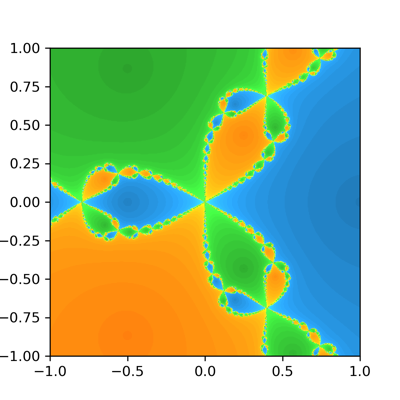</center>


Mit der Konvergenzgeschwindigkeit können wir die Färbung interessanter gestalten: Wir färben nicht nur nach Nullstelle, sondern auch danach wie viele Iterationen gebraucht werden, um Nahe der Nullstelle zu landen. Dabei wollen wir es so machen, dass alle Punkte, die zu einer bestimmten Nullstelle konvergieren, die gleiche Grundfarbe, etwa blau, erhalten, die Farbe aber um so heller ist, je länger die Konvergenz dauert. 

Dazu stelle ich Ihnen eine Funktion <code>get_colourmap</code> mit Parameter <code>num_shades</code> zur Verfügung, die hintereinander weg in einer Liste jeweils <code>num_shades</code> viele Schattierungen von Grundfarben zurückliefert.

In [ ]:
import matplotlib.colors as colors

def make_lighter(colour,how_much,num_shades=10):
    if isinstance(colour,str):
        rgb=colors.to_rgb(colour)
    else:
        rgb=colour
    factor=1+how_much/num_shades*2
    return tuple(np.clip(np.array(rgb)*factor,a_min=0,a_max=1))

tab_colours=["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]

def get_colourmap(num_shades=40,base_colours=tab_colours):
    colourmap=[make_lighter(base_colour,i,num_shades=num_shades) for base_colour in base_colours for i in range(num_shades)]
    colourmap.append((0,0,0)) # schwarz ganz ans Ende (für später)
    return colourmap

colourmap=get_colourmap(num_shades=4)
plt.imshow(np.reshape(colourmap[:12],(1,-1,3)))
plt.yticks([])
plt.xticks(range(12))
plt.show()

Wir sehen: Mit <code>num_shades=4</code> bekommen wir eine Liste, in der an Position 0 die Farbe blau ist, an Position 1 ein helleres blau, an Position 2 ein noch helleres blau, an Position 3 Babyblau, an Position 4 orange usw. Der Übersichtlichkeit wegen sind hier nur die ersten drei Grundfarben gezeigt; insgesamt gibt es 10 Grundfarben. Später werden wir <code>get_colourmap</code> mit 40 Schattierungen (der default-Wert) benutzen.

Als nächstes adaptieren wir die Methode <code>show_fractal</code>, so dass die Punkte nach Wurzel und Anzahl der Iterationen eingefärbt werden. Dafür nutzen wir <code>get_colourmap</code> und <code>ax.contourf(rr,ii,values,levels=levels,colors=colourmap)</code>. Dabei gibt der Parameter <code>levels</code> an, bei welchen Werten in <code>values</code> eine neue Farbe verwendet werden soll. Zweckmäßig ist es hier <code>levels=np.arange(len(colourmap)+1)-0.5</code> zu verwenden. Wir weisen <code>values</code> so Werte zu, dass die Grundfarbe der Nullstelle entspricht und die Helligkeit durch die Anzahl der Iterationen bestimmt wird. ZB: Konvergenz zur ersten Nullstelle mit 2 Iterationen könnte in einem Wert von 0 resultieren, Konvergenz zur zweiten Nullstelle mit 97 Iterationen könnte in einem Wert von 39 resultieren, Konvergenz zur zweiten Nullstelle mit 3 Iteration vielleicht Wert 40 (denn da fängt die neue Grundfarbe an) etc. Je nachdem wie hoch <code>max_iter</code> gesetzt war und je nachdem wie viele Iterationen typischerweise bis zur Konvergenz benötigt werden, müssen Sie eventuell die Anzahl der Iterationen noch skalieren. Beispiel: Die Anzahl der Iterationen geht von 1 bis 200. Bei 40 Helligkeitsstufen sollten jeweils 1-5,6-10,11-15,... Iterationen die gleiche Helligkeit erhalten.

In [ ]:
def bin(iterations,num_bins,max_iter):
    # diese Lösung ist ein wenig komplizierter als nötig
    # np.clip ersetzt alle Werte kleiner als a_min mit a_min und alle Werte größer als a_max mit a_max
    return np.clip(iterations*num_bins//max_iter,a_min=0,a_max=num_bins-1)

def show_fractal(rr,ii,z,iterations,roots,max_iter,eps=0.01):
    num_shades=40
    colourmap=get_colourmap()
    rootmap=np.zeros(shape=z.shape)
    for i,root in enumerate(roots):
        rootmap+=np.where(np.absolute(z-root)<eps,i,0)

    values=rootmap*num_shades+bin(iterations,num_shades,max_iter) # Grundfarbe plus Schattierungen
    values=np.where(np.isinf(z),len(colourmap)-1,values) # markiere die nicht-konvergenten Punkte

    levels=np.arange(len(colourmap)+1)-0.5
    fig,ax=plt.subplots(figsize=(4,4))
    ax.contourf(rr,ii,values,levels=levels,colors=colourmap)

## Wir probieren es gleich mal aus
## Wenn Sie es nicht geschafft haben, find_roots zu implementieren, oder Ihnen fun2, deriv2 fehlen, 
## dann ersetzen Sie die folgenden zwei Code-Zeilen durch:
# rr,ii,z,iterations=newton_fract(fun1,deriv1)
# roots=[1,-0.5+3**0.5/2*1j,-0.5-3**0.5/2*1j]

rr,ii,z,iterations=newton_fract(fun2,deriv2,real_lim=(-0.7,-0.5),imag_lim=(-0.6,-0.4),max_iter=100)
roots=find_roots(z)
show_fractal(rr,ii,z,iterations,roots,40)

## Keine Konvergenz

Das Newton-Verfahren muss nicht überall konvergieren: An manchen Stellen kann das Verfahren divergieren oder in Schleifen gefangen werden. Wir wollen diese Stellen mit schwarz einfärben. Wie merken wir, ob an einer Stelle es nicht zur Konvergenz kommt? Wenn nach <code>max_iter</code> vielen Iterationen der Wert immer noch nicht $\epsilon$-nahe im Vorgänger ist. Also, wenn gilt
$$
|z_M-z_{M-1}|>\epsilon,
$$
wobei $M$ die maximale Anzahl an Iterationen ist (also gleich <code>max_iter</code>).

### Aufgabe: Divergenz
* Markieren Sie nach Anwendung von <code>newton_frac</code> alle Stellen von <code>z</code>, die nicht konvergiert sind mit <code>np.inf</code>. (Sauberer wäre es, die Methode <code>newton_fract</code> zu adaptieren -- die wollen wir aber nicht noch einmal ändern.)
* Implementieren Sie das Polynom $z^4-4.29z^2-5.29$ als Methode <code>fun3</code> und dessen Ableitung als <code>deriv3</code>.

Anschließend plotten wir das Ergebnis. Sie sollten deutlich einige schwarze Flecken sehen -- das sind die nicht konvergenten Stellen. Sollte es Ihnen nicht gelungen sein, <code>find_roots</code> korrekt zu implementieren, so können Sie wieder Wolfram Alpha bemühen und die Nullstellen händisch eintragen.

In [ ]:
### BEGIN SOLUTION
# Ihre Lösung hier
### END SOLUTION

max_iter=100

rr,ii,z,iterations=newton_fract(fun3,deriv3,real_lim=(-2,2),imag_lim=(-2,2),max_iter=100)

# alle divergenten Stellen mit np.inf markieren -- dies wäre sauberer innerhalb von newton_fract
### BEGIN SOLUTION
# Ihre Lösung hier
### END SOLUTION

# Wir plotten das Ergebnis
roots=find_roots(z) # wenn Sie find_roots nicht implementiert haben, geben Sie die Nullstellen hier explizit an
show_fractal(rr,ii,z,iterations,roots,40)